In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob

from matplotlib.pyplot import cm
%matplotlib inline

from motion_model import sample_motion_model_velocity, predict_trajectory, plot_trajectory, plot_real_trajectories

In [ ]:

straight = np.genfromtxt("straight/straight.csv", delimiter=',', skip_header=1)
left = np.genfromtxt("left/left.csv", delimiter=',', skip_header=1)
slight_left = np.genfromtxt("slight_left/slight_left.csv", delimiter=',', skip_header=1)
right = np.genfromtxt("right/right.csv", delimiter=',', skip_header=1)
slight_right = np.genfromtxt("slight_right/slight_right.csv", delimiter=',', skip_header=1)


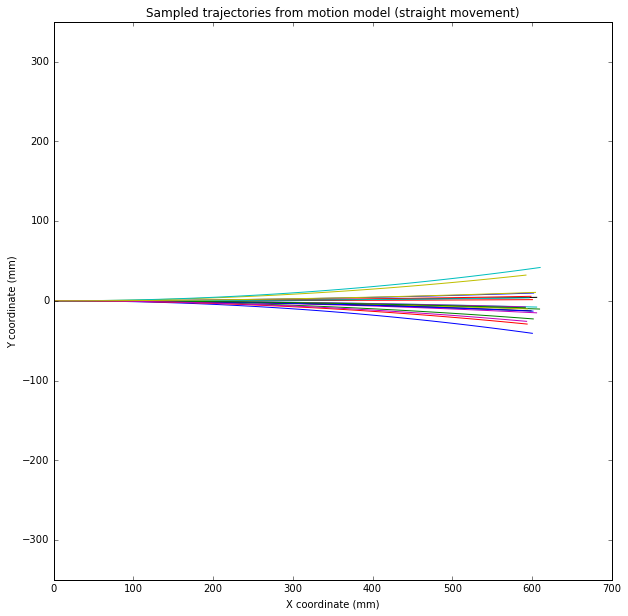

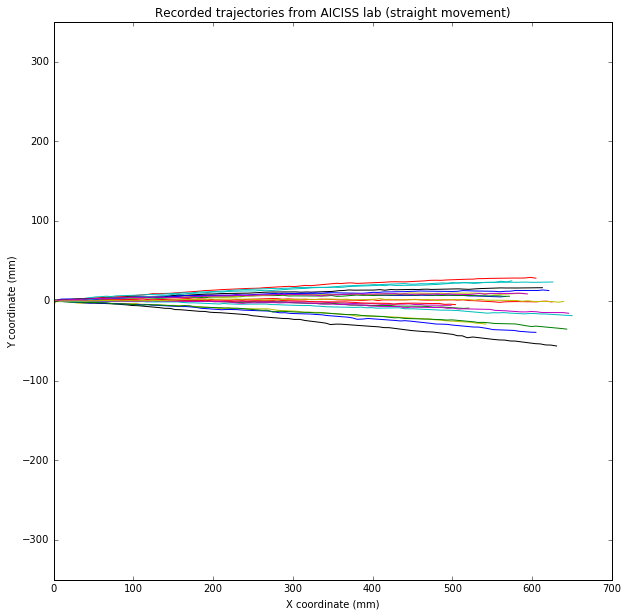

In [15]:
#Draw predicted trajectories of front
alpha = [  1.18337602e-02,   4.50020855e-06,   7.97143571e-05,   6.31096021e-06,
   7.37806701e-05,   6.78659476e-06]
u = [100, 0]
pose_start = [0, 0, 0]
delta_t = 0.1
duration = 6
repeat = 20

plt.figure(figsize=(10,10))
paths = predict_trajectory(u, pose_start, alpha, delta_t, duration, repeat, single_gaussian=True)
plot_trajectory(paths)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Sampled trajectories from motion model (straight movement)")
plt.axis('equal')
plt.axis([0, 700, -300, 300])
plt.show()

# os.chdir("aiciss/straight/")
# trajectories = list()
# trajectories_end = list()
# times = list()

# files = list()
# for f in glob.glob("*.csv"):
#     data = np.genfromtxt(f, delimiter=',')
#     nb_experiment = 1
#     plot_real_trajectories(data, nb_experiment)
#     pass
plt.figure(figsize=(10,10))
data = np.loadtxt("aiciss/straight1.log", usecols=(0,2,3,4))
nb_experiment = 4
plot_real_trajectories(data, nb_experiment)
data = np.loadtxt("aiciss/straight2.log", usecols=(0,2,3,4))
nb_experiment = 4
plot_real_trajectories(data, nb_experiment)
data = np.loadtxt("aiciss/straight3.log", usecols=(0,2,3,4))
nb_experiment = 4
plot_real_trajectories(data, nb_experiment)
data = np.loadtxt("aiciss/straight4.log", usecols=(0,2,3,4))
nb_experiment = 4
plot_real_trajectories(data, nb_experiment)
data = np.loadtxt("aiciss/straight5.log", usecols=(0,2,3,4))
nb_experiment = 4
plot_real_trajectories(data, nb_experiment)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Recorded trajectories from AICISS lab (straight movement)")
plt.axis('equal')
plt.axis([0, 700, -300, 300])
plt.show()
# os.chdir("../../")

#Draw real trajectories


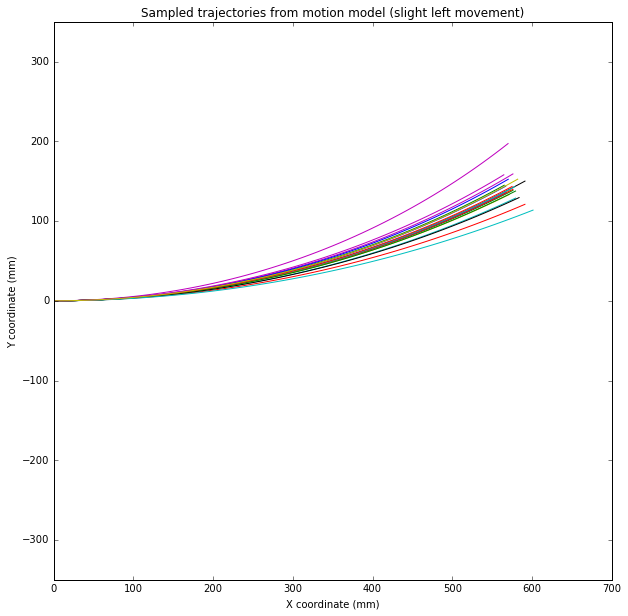

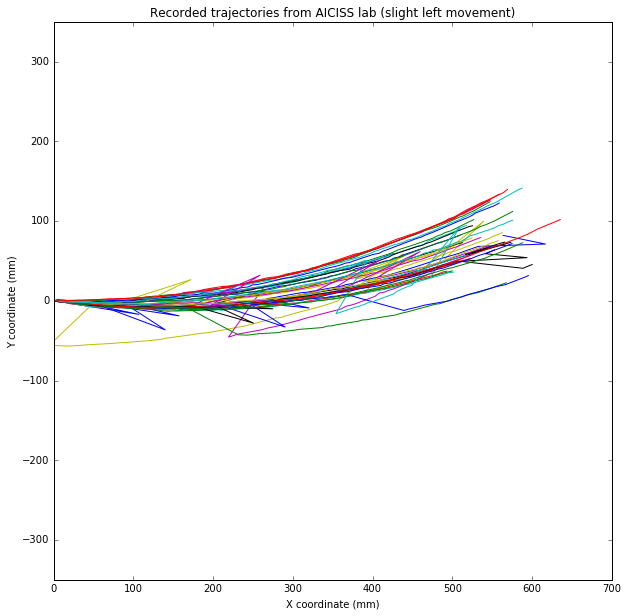

In [16]:
u = [100, np.radians(4.77)]

plt.figure(figsize=(10,10))
paths = predict_trajectory(u, pose_start, alpha, delta_t, duration, repeat, single_gaussian=True)
plot_trajectory(paths)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Sampled trajectories from motion model (slight left movement)")
plt.axis('equal')
plt.axis([0, 700, -300, 300])
plt.show()

plt.figure(figsize=(10,10))
data = np.loadtxt("aiciss/new_slightLeft1.log", usecols=(0,2,3,4))
nb_experiment = int(len(data)/(6000/((data[-1, 0] - data[0, 0])/len(data))))
data[:,1:3] = -data[:,1:3]
plot_real_trajectories(data, nb_experiment)
# data = np.loadtxt("aiciss/new_slightLeft2.log", usecols=(0,2,3,4))
# data[:,1:3] = -data[:,1:3]
# nb_experiment = int(len(data)/(6000/((data[-1, 0] - data[0, 0])/len(data))))
# plot_real_trajectories(data, nb_experiment)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Recorded trajectories from AICISS lab (slight left movement)")
plt.axis('equal')
plt.axis([0, 700, -300, 300])
plt.show()
# os.chdir("../../")


In [ ]:
print(len(data)/(6000/((data[-1, 0] - data[0, 0])/len(data))))

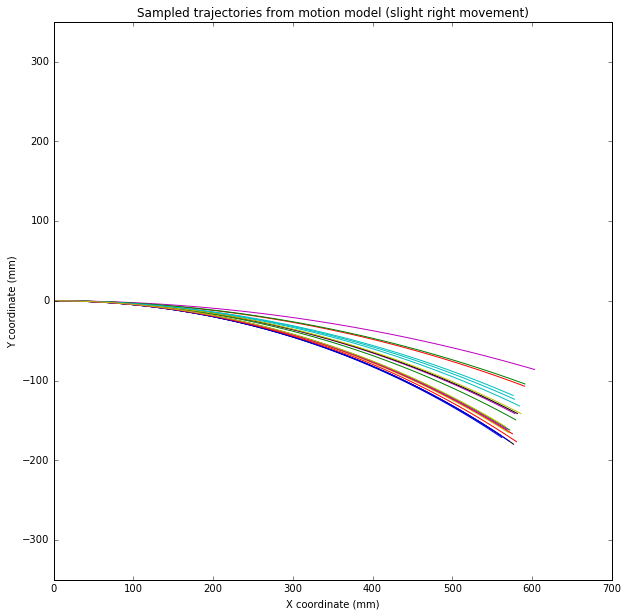

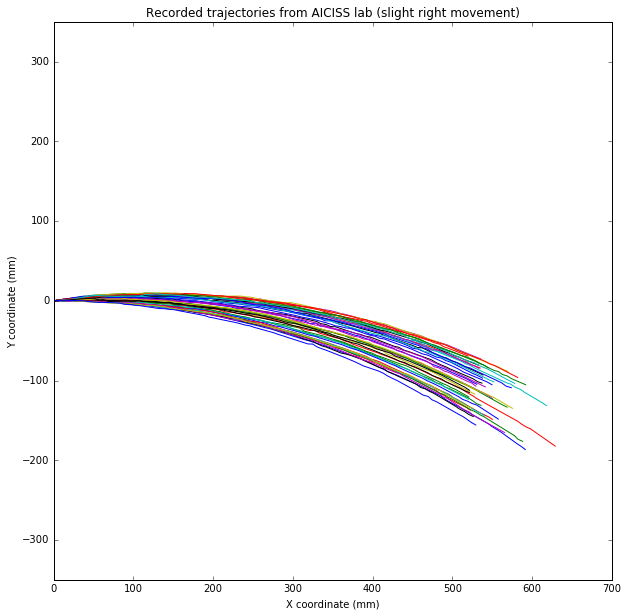

In [17]:
u = [100, np.radians(-4.77)]

plt.figure(figsize=(10,10))
paths = predict_trajectory(u, pose_start, alpha, delta_t, duration, repeat, single_gaussian=True)
plot_trajectory(paths)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Sampled trajectories from motion model (slight right movement)")
plt.axis('equal')
plt.axis([0, 700, -300, 300])
plt.show()

plt.figure(figsize=(10,10))
data = np.loadtxt("aiciss/slightRight.log", usecols=(0,2,3,4))
nb_experiment = int(len(data)/(6000/((data[-1, 0] - data[0, 0])/len(data))))
plot_real_trajectories(data, nb_experiment)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Recorded trajectories from AICISS lab (slight right movement)")
plt.axis('equal')
plt.axis([0, 700, -300, 300])
plt.show()

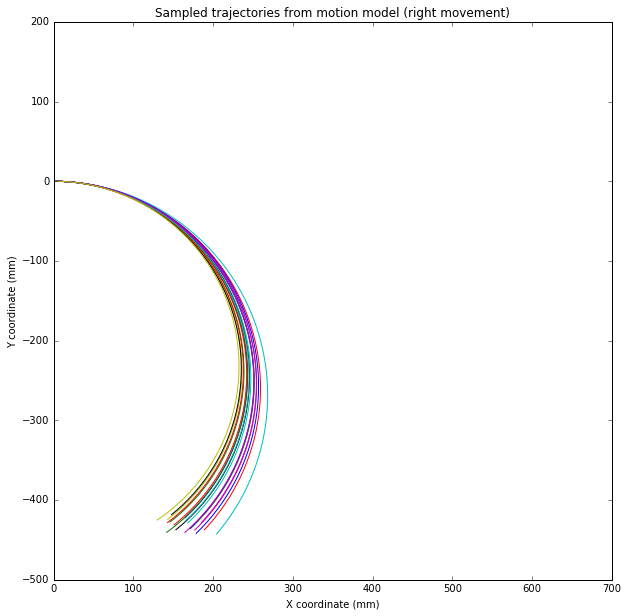

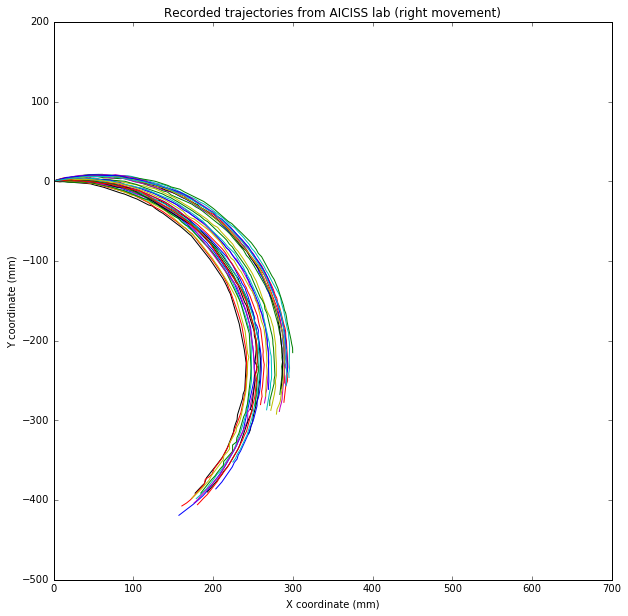

In [21]:
u = [100, np.radians(-22.92)]

plt.figure(figsize=(10,10))
paths = predict_trajectory(u, pose_start, alpha, delta_t, duration, repeat, single_gaussian=True)
plot_trajectory(paths)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Sampled trajectories from motion model (right movement)")
plt.axis('equal')
plt.axis([0, 700, -500, 200])
plt.show()

plt.figure(figsize=(10,10))
data = np.loadtxt("aiciss/right.log", usecols=(0,2,3,4))
data[:,1:3] = -data[:,1:3]
nb_experiment = int(len(data)/(6000/((data[-1, 0] - data[0, 0])/len(data))))
plot_real_trajectories(data, nb_experiment)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Recorded trajectories from AICISS lab (right movement)")
plt.axis('equal')
plt.axis([0, 700, -500, 200])
plt.show()

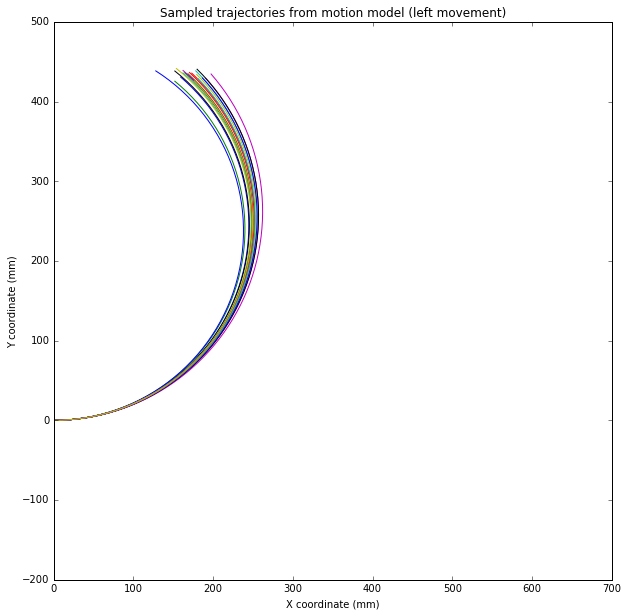

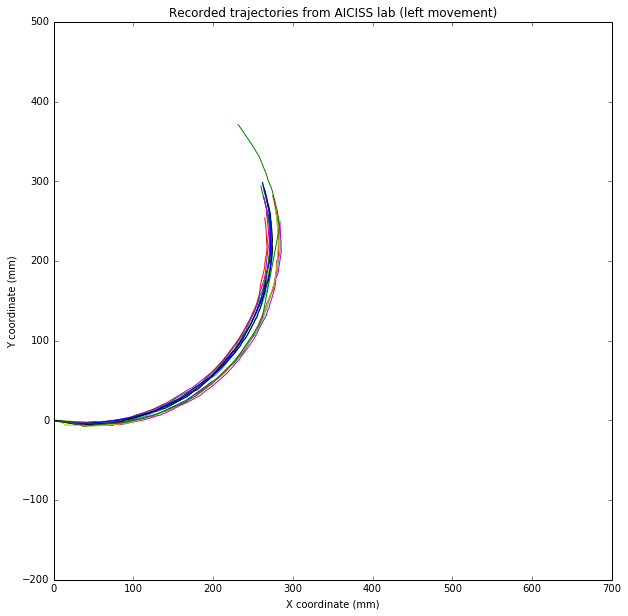

In [24]:
u = [100, np.radians(22.92)]

plt.figure(figsize=(10,10))
paths = predict_trajectory(u, pose_start, alpha, delta_t, duration, repeat, single_gaussian=True)
plot_trajectory(paths)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Sampled trajectories from motion model (left movement)")
plt.axis('equal')
plt.axis([0, 700, -200, 500])
plt.show()

plt.figure(figsize=(10,10))
data = np.loadtxt("aiciss/left1.log", usecols=(0,2,3,4))
data[:,1:3] = -data[:,1:3]
nb_experiment = int(len(data)/(6000/((data[-1, 0] - data[0, 0])/len(data))))
plot_real_trajectories(data, nb_experiment)
plt.ylabel("Y coordinate (mm)")
plt.xlabel("X coordinate (mm)")
plt.title("Recorded trajectories from AICISS lab (left movement)")
plt.axis('equal')
plt.axis([0, 700, -200, 500])
plt.show()

In [ ]:
def sample_normal_distribution(variance):
    rand_sum = 0
    for i in range(12):
        rand_sum = rand_sum + random.uniform(-1, 1)
    return rand_sum * variance / 6


In [ ]:
alpha = [1.17512789e-02, 7.52160502e-06, 8.68899519e-07, 4.39043162e-05, 2.10377124e-06, 5.98286575e-05]


v = 100
omega = 0
sample_straight = np.zeros((30, 3))
# straight samples
for i in range(30):
    sample_straight[i] = sample_motion_model_velocity([v, omega], [0, 0, 0], alpha, straight[1][0])
    pass

In [ ]:
def plot_poses(X, Y, theta, color='Teal'):
    UN1 = np.cos(theta)
    VN1 = np.sin(theta)

    plt.quiver(X, Y, UN1, VN1, 
               color=color, 
               headlength=7)
    red_patch = mpatches.Patch(color='red', label='Original data')
    teal_patch = mpatches.Patch(color='Teal', label='Sampled data')
    plt.legend(handles=[red_patch, teal_patch], bbox_to_anchor=(1.05, 1), loc=2)
    plt.ylabel('y (mm)')
    plt.xlabel('x (mm)')
    pass

plot = plt.figure(figsize=(10,10))
plt.title('Plot of robot poses after straight forward commands')
plot_poses(sample_straight[:, 0], sample_straight[:, 1], sample_straight[:, 2],)
plot_poses(straight[:, 1], straight[:, 2], straight[:, 3], color='Red')

axes = plt.gca()
axes.set_xlim([520,650])

plt.grid()
plt.show(plot)

In [ ]:
v = 100
omega = np.radians(22.92)
sample_left = np.zeros((30, 3))
for i in range(30):
    sample_left[i] = sample_motion_model_velocity([v, omega], [0, 0, 0], alpha, left[1][0])
    pass

plot = plt.figure(figsize=(10,10))
plt.title('Plot of robot poses after left commands')
plot_poses(sample_left[:, 0], sample_left[:, 1], sample_left[:, 2])
plot_poses(left[:, 1], left[:, 2], left[:, 3], color='Red')

plt.grid()
plt.show(plot)

In [ ]:
v = 100
omega = np.radians(4.77)
sample_slight_left = np.zeros((30, 3))
for i in range(30):
    sample_slight_left[i] = sample_motion_model_velocity([v, omega], [0, 0, 0], alpha, slight_left[1][0])
    pass

plot = plt.figure(figsize=(10,10))
plt.title('Plot of robot poses after slight left commands')
plot_poses(sample_slight_left[:, 0], sample_slight_left[:, 1], sample_slight_left[:, 2])
plot_poses(slight_left[:, 1], slight_left[:, 2], slight_left[:, 3], color='Red')

axes = plt.gca()
axes.set_xlim([500,625])
red_patch = mpatches.Patch(color='red', label='Original data')
teal_patch = mpatches.Patch(color='Teal', label='Sampled data')
plt.legend(handles=[red_patch, teal_patch], bbox_to_anchor=(1.05, 1), loc=2)
plt.grid()
plt.show(plot)

In [ ]:
v = 100
omega = np.radians(-22.92)
sample_right = np.zeros((30, 3))
for i in range(30):
    sample_right[i] = sample_motion_model_velocity([v, omega], [0, 0, 0], alpha, right[1][0])
    pass

plot = plt.figure(figsize=(10,10))
plt.title('Plot of robot poses after right commands')
plot_poses(sample_right[:, 0], sample_right[:, 1], sample_right[:, 2])
plot_poses(right[:, 1], right[:, 2], right[:, 3], color='Red')

axes = plt.gca()
axes.set_ylim([-450,-200])
red_patch = mpatches.Patch(color='red', label='Original data')
teal_patch = mpatches.Patch(color='Teal', label='Sampled data')
plt.legend(handles=[red_patch, teal_patch], bbox_to_anchor=(1.05, 1), loc=2)
plt.grid()
axes = plt.gca()
plt.show(plot)

In [ ]:
v = 100
omega = np.radians(-4.77)
sample_slight_right = np.zeros((30, 3))
for i in range(30):
    sample_slight_right[i] = sample_motion_model_velocity([v, omega], [0, 0, 0], alpha, slight_right[1][0])
    pass

plot = plt.figure(figsize=(10,10))
plt.title('Plot of robot poses after slight right commands')
plot_poses(sample_slight_right[:, 0], sample_slight_right[:, 1], sample_slight_right[:, 2])
plot_poses(slight_right[:, 1], slight_right[:, 2], slight_right[:, 3], color='Red')

axes = plt.gca()
axes.set_xlim([500,625])
red_patch = mpatches.Patch(color='red', label='Original data')
teal_patch = mpatches.Patch(color='Teal', label='Sampled data')
plt.legend(handles=[red_patch, teal_patch], bbox_to_anchor=(1.05, 1), loc=2)
plt.grid()
plt.show(plot)